<a href="https://colab.research.google.com/github/darieyr/met-hb/blob/main/methemoglobine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("spr4.csv")
guanidyna = [0.0, 0.25, 0.50, 0.75, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.25, 2.5, 2.75, 3.0, 3.5, 4.0]
data.insert(0, "guanidyna", guanidyna, True)
data

,guanidyna,abs_409
0,0.00,0.976
1,0.25,1.236
2,0.50,1.185
3,0.75,1.438
4,1.00,1.502
5,1.10,1.128
6,1.20,0.909
7,1.30,0.580
8,1.40,0.326
9,1.50,0.393


<Axes: title={'center': 'Zależność absorbancji badanych roztworów mioglobiny od stężenia guanidyny'}, xlabel='Stężenie guanidyny, [M]', ylabel='Absorbancja'>

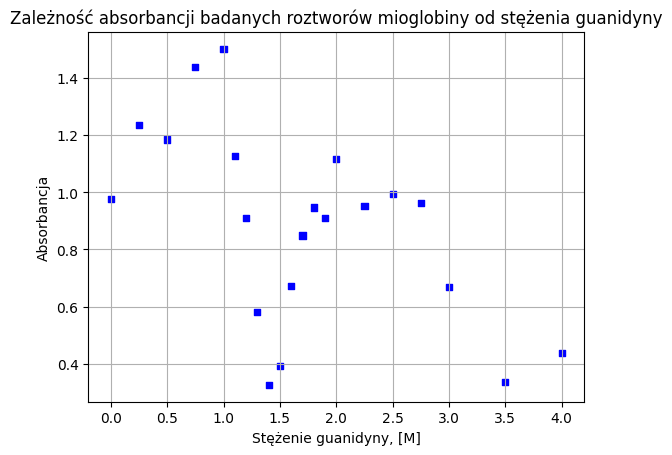

In [ ]:

data.plot(x="guanidyna", y="abs_409",
    kind="scatter", title="Zależność absorbancji badanych roztworów mioglobiny od stężenia guanidyny", color='b', grid="-", linestyle="", marker=',', xlabel="Stężenie guanidyny, [M]", ylabel="Absorbancja", linewidth=5)



In [ ]:
data = data.drop(labels=[1, 4, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20], axis=0)
data
#zniszczyłam wartości obarczone błędem

,guanidyna,abs_409
0,0.00,0.976
2,0.50,1.185
3,0.75,1.438
6,1.20,0.909
7,1.30,0.580
9,1.50,0.393
19,3.50,0.335


<Axes: title={'center': 'Zależność absorbancji badanych roztworów mioglobiny od stężenia guanidyny'}, xlabel='Stężenie guanidyny, [M]', ylabel='Absorbancja'>

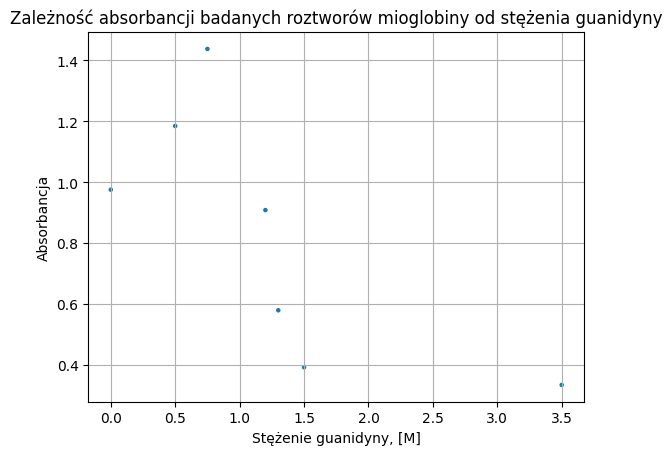

In [ ]:
data.plot(x="guanidyna", y="abs_409",
    kind="scatter", title="Zależność absorbancji badanych roztworów mioglobiny od stężenia guanidyny", grid="-", linestyle="", marker=".", xlabel="Stężenie guanidyny, [M]", ylabel="Absorbancja", linewidth=5)


In [ ]:
import plotly.express as px

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def linia(x, b1, b2, m0, m1, m2, G):
    return (b2+m2*x)+(b1+m1*x)/(1+np.exp((-G+m0*x)/(0.00199*293)))

popt, pcov=curve_fit(f=linia,
    xdata=data.guanidyna,
    ydata=data.abs_409, p0=[0.58, 0.408, 6.97, 0.614, -0.021, 8.04])

b1, b2, m0, m1, m2, G=popt
popt, pcov

(array([ 0.53940705,  0.41528784,  8.31290398,  0.61247234, -0.02297773,
         9.76453441]),
 array([[ 4.19194206e-02, -3.60887115e-02, -5.29020248e-01,
         -1.96791144e-02,  1.17601673e-02, -6.09774113e-01],
        [-3.60887115e-02,  3.63141573e-02,  5.43810709e-01,
          1.03729420e-02, -1.18253970e-02,  6.31462277e-01],
        [-5.29020248e-01,  5.43810709e-01,  1.88767956e+01,
          7.88721252e-02, -1.58588723e-01,  2.25826736e+01],
        [-1.96791144e-02,  1.03729420e-02,  7.88721252e-02,
          2.62161398e-02, -3.90232603e-03,  7.47729409e-02],
        [ 1.17601673e-02, -1.18253970e-02, -1.58588723e-01,
         -3.90232603e-03,  4.32438113e-03, -1.83929518e-01],
        [-6.09774113e-01,  6.31462277e-01,  2.25826736e+01,
          7.47729409e-02, -1.83929518e-01,  2.70624126e+01]]))

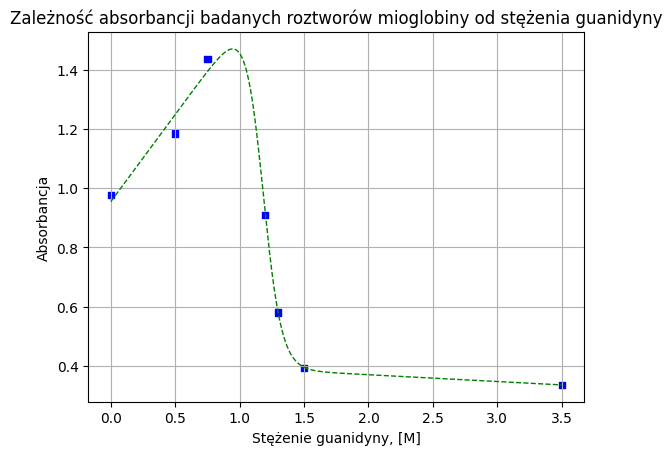

In [ ]:
b1, b2, m0, m1, m2, G=popt
x_model = np.linspace(min(data["guanidyna"]), max(data["guanidyna"]), 1000)
y_model = linia (x_model, b1, b2, m0, m1, m2, G) 
 
data.plot(x="guanidyna", y="abs_409",
    kind="scatter", title="Zależność absorbancji badanych roztworów mioglobiny od stężenia guanidyny", color='b', grid="-", linestyle="", marker=',', xlabel="Stężenie guanidyny, [M]", ylabel="Absorbancja", linewidth=5)
plt.plot(x_model, y_model, linestyle="--", color='g', linewidth=1)
plt.show()

In [ ]:
print("b1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("b2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("m0 =", popt[2], "+/-", pcov[2,2]**0.5)
print("m1 =", popt[3], "+/-", pcov[3,3]**0.5)
print("m2 =", popt[4], "+/-", pcov[4,4]**0.5)
print("G =", popt[5], "+/-", pcov[5,5]**0.5)

b1 = 0.5394070531390656 +/- 0.20474232739116577
b2 = 0.41528783763446736 +/- 0.19056273841990856
m0 = 8.312903983859288 +/- 4.344743448904629
m1 = 0.6124723414505806 +/- 0.16191398878947322
m2 = -0.02297772566494705 +/- 0.06576002686001488
G = 9.764534409085009 +/- 5.202154613443871


In [ ]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [ ]:
help(np.linspace)


Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that 